<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Load the adults income dataset and print first five observations**

In [2]:
# type your code here
ds1 = pd.read_csv('adult_income.csv')
ds1.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
ds1.sex.astype(str)
print(ds1.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex                int64
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
ds1.groupby('sex')['age'].mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
ds1['capital.gain'].quantile(0.95)

5013.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
ds1.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
ds1.groupby('workclass')['age'].median()

workclass
?                   35
Federal-gov         43
Local-gov           41
Never-worked        18
Private             35
Self-emp-inc        45
Self-emp-not-inc    44
State-gov           39
Without-pay         57
Name: age, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
print('Mean: ',ds1['capital.gain'].mean())
print('Trimmed Mean: ',sp.stats.trim_mean(ds1['capital.gain'],0.01))
print("there are a lot of outliers in capital gain, removing only 1% of the values from either ends changes the mean drastiaclly")

Mean:  1077.6488437087312
Trimmed Mean:  493.7085331077058
there are a lot of outliers in capital gain, removing only 1% of the values from either ends changes the mean drastiaclly


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
ds1['race'].value_counts(normalize = True)

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: race, dtype: float64

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
ds1.groupby('occupation')['hours.per.week'].var()

occupation
?                    225.317543
Adm-clerical          91.964888
Armed-Forces         198.000000
Craft-repair          81.939394
Exec-managerial      123.412395
Farming-fishing      299.987814
Handlers-cleaners    111.946104
Machine-op-inspct     57.648955
Other-service        161.442544
Priv-house-serv      261.939597
Prof-specialty       157.159186
Protective-serv      152.072728
Sales                175.202547
Tech-support         112.001859
Transport-moving     161.833503
Name: hours.per.week, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
x = sp.percentile(ds1['hours.per.week'],75)
y = sp.percentile(ds1['hours.per.week'],25)
print(x-y)

5.0


C:\Users\fayiq\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  
C:\Users\fayiq\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.percentile is deprecated and will be removed in SciPy 2.0.0, use numpy.percentile instead
  This is separate from the ipykernel package so we can avoid doing imports until


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
print(ds1.var())
print('The variables with the lowest variability can be let go from further analysis')

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
sex               2.213763e-01
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.527370e+02
dtype: float64
The variables with the lowest variability can be let go from further analysis


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
(ds1.groupby('workclass')['hours.per.week'].std() / ds1.groupby('workclass')['hours.per.week'].mean()) * 100

workclass
?                   46.711116
Federal-gov         21.360037
Local-gov           26.283120
Never-worked              NaN
Private             27.954085
Self-emp-inc        28.473900
Self-emp-not-inc    37.537713
State-gov           29.968071
Without-pay         53.059084
Name: hours.per.week, dtype: float64

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

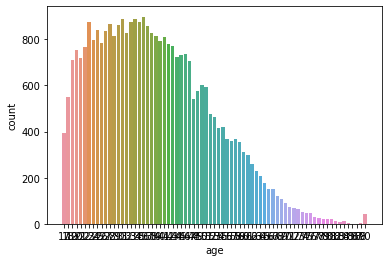

In [14]:
def func1(fea):
    ds1[fea].value_counts().head(1)
    sns.countplot(ds1[fea])
    sns.countplot(data = ds1, x = fea)
    plt.plot()
    
func1('age')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 800x640 with 0 Axes>

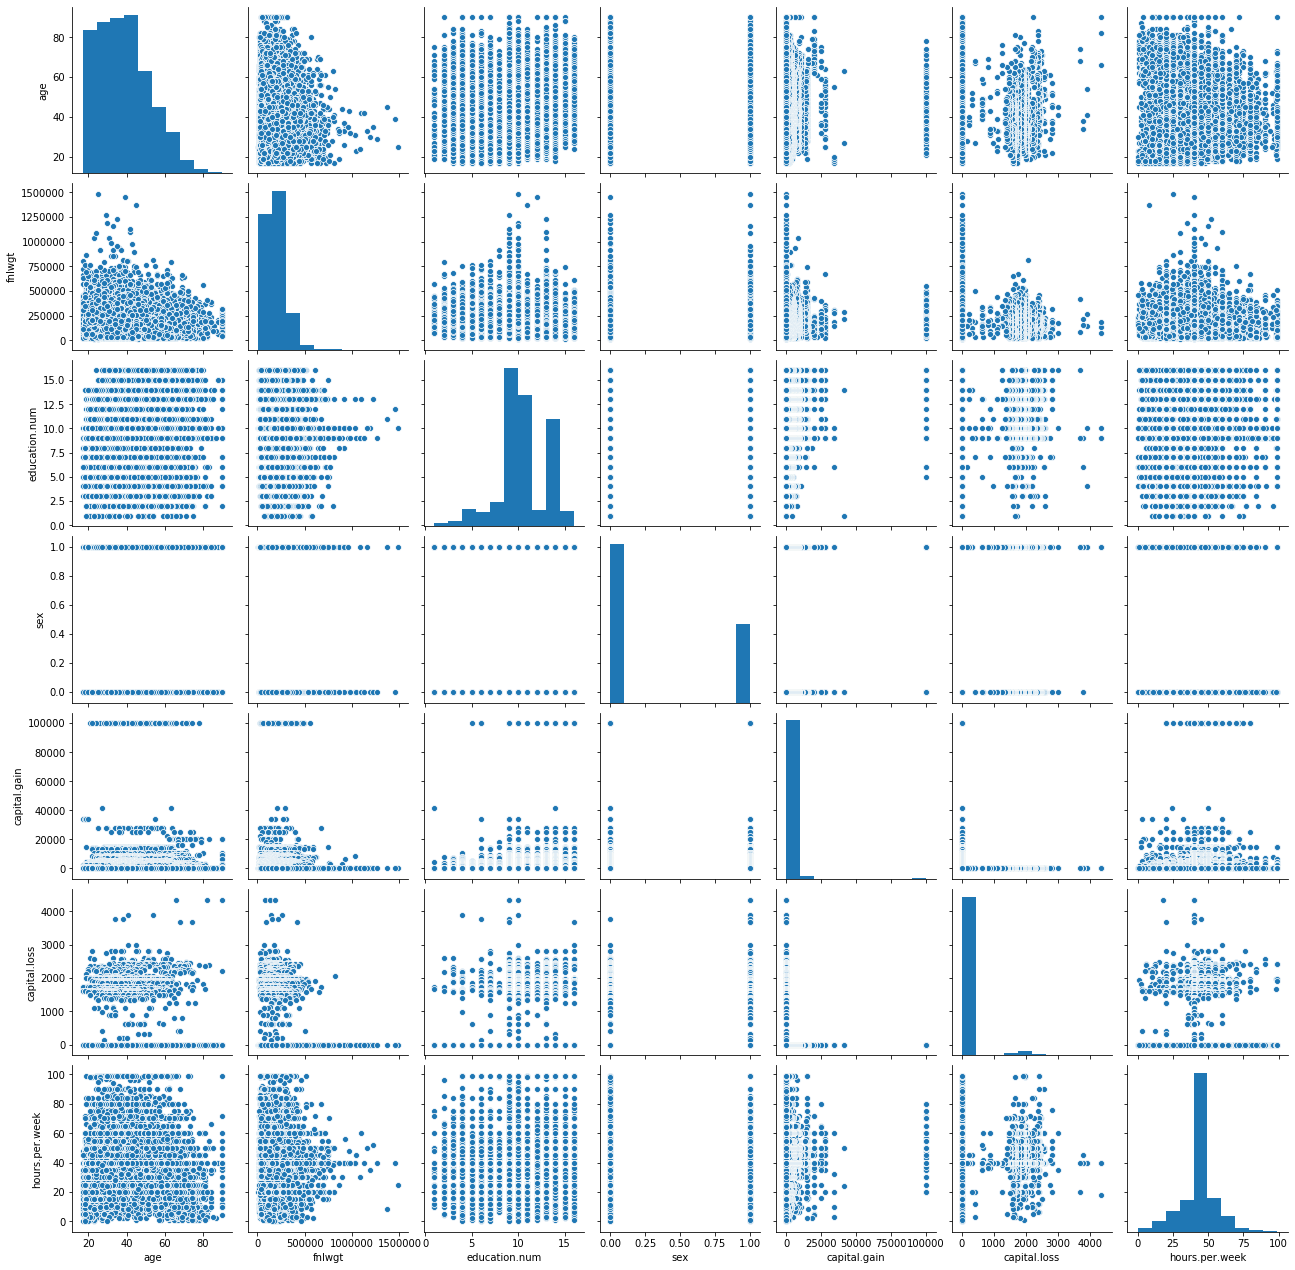

From the above graph it is seen that hours per week is normally distributed.


In [15]:
# type your code here
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(ds1)
plt.show()
print('From the above graph it is seen that hours per week is normally distributed.')


14. Identify the working class for most of the population in the data

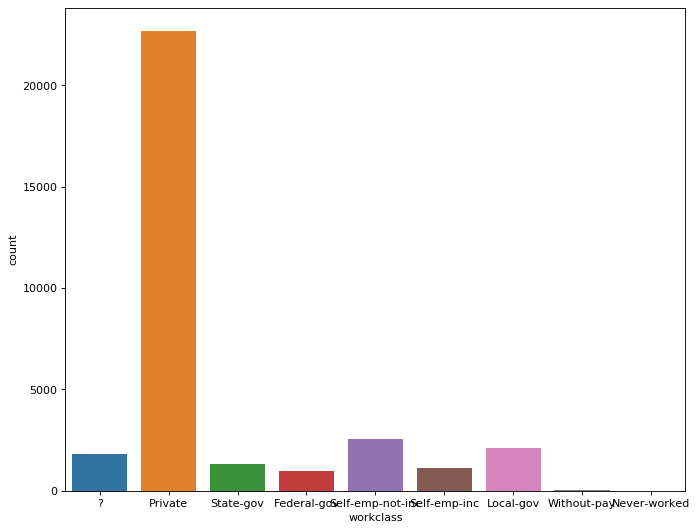

From the above graph it is noticed Private sector has more employees.


In [16]:
# type your code here
plt.figure(figsize=(10,8), dpi= 80)
sns.countplot(ds1['workclass'])
plt.show()
print('From the above graph it is noticed Private sector has more employees.')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

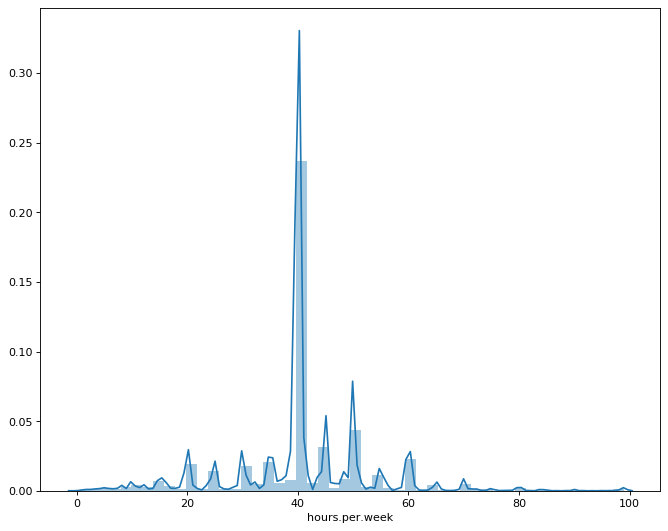

In [17]:
# type your code here
plt.figure(figsize=(10,8), dpi= 80)
sns.distplot(ds1['hours.per.week'])
plt.show()

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

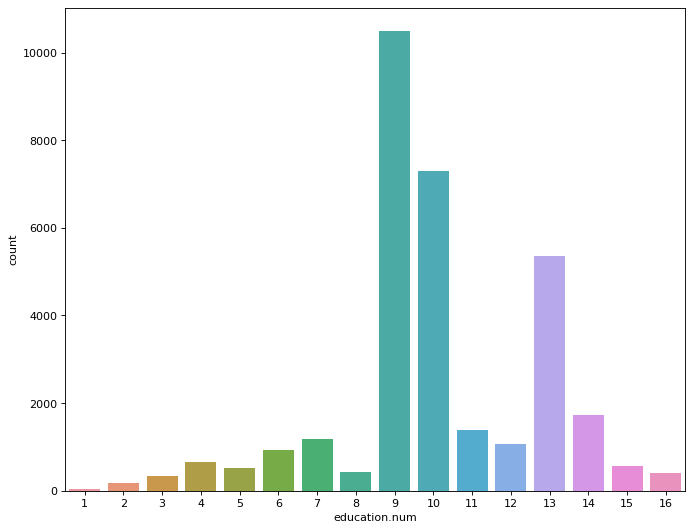

In [18]:
# type your code here
plt.figure(figsize=(10,8), dpi= 80)
sns.countplot(ds1['education.num'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
for col in ds1.columns:
    if(ds1[col].dtype=='int64'):
        print(col,' kurt value is: ',ds1[col].kurt())
        if(ds1[col].kurt() > 0):
            print('This has high density')
        elif(ds1[col].kurt() < 0):
            print('This has low density')
        else:
            Print('This has symetric density')


age  kurt value is:  -0.16612745957143993
This has low density
fnlwgt  kurt value is:  6.218810978153803
This has high density
education.num  kurt value is:  0.6234440747629244
This has high density
sex  kurt value is:  -1.48270930314248
This has low density
capital.gain  kurt value is:  154.7994378542533
This has high density
capital.loss  kurt value is:  20.37680171341222
This has high density
hours.per.week  kurt value is:  2.916782490794851
This has high density


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

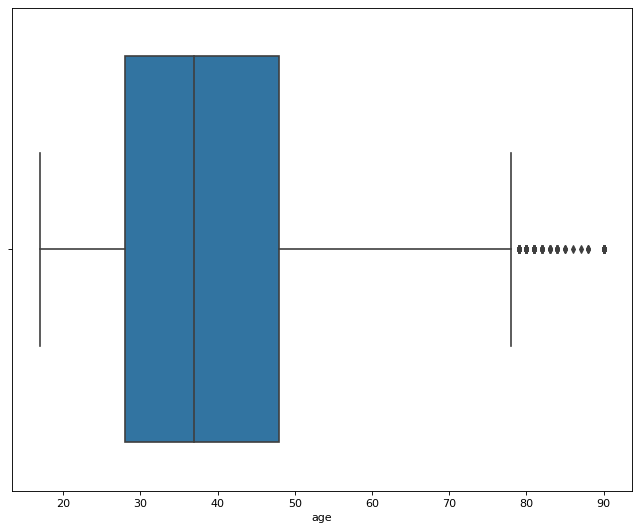

In [20]:
# type your code here
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(ds1['age'])
plt.show()

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

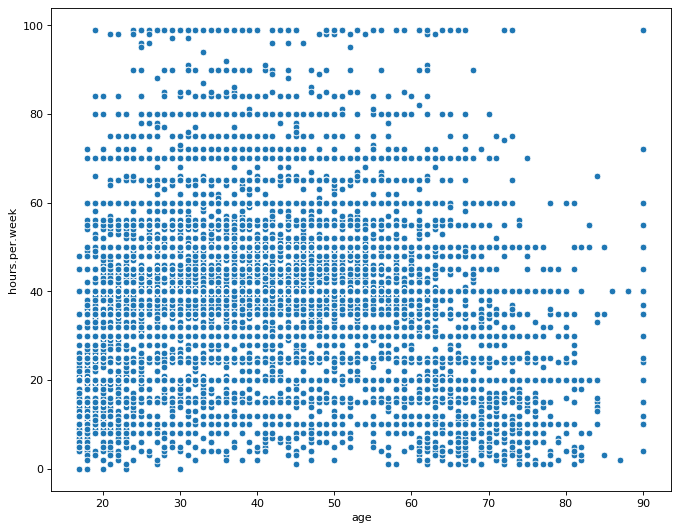

In [21]:
# type your code here
plt.figure(figsize=(10,8), dpi= 80)
sns.scatterplot(ds1['age'],ds1['hours.per.week'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
x = ds1.corr()
x

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,-0.088832,0.077674,0.057775,0.069311
fnlwgt,-0.076646,1.000000,-0.043195,-0.026858,0.000432,-0.010252,-0.019033
education.num,0.036527,-0.043195,1.000000,-0.012280,0.122630,0.079923,0.148544
sex,-0.088832,-0.026858,-0.012280,1.000000,-0.048480,-0.045567,-0.229017
capital.gain,0.077674,0.000432,0.122630,-0.048480,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.045567,-0.031615,1.000000,0.054314
hours.per.week,0.069311,-0.019033,0.148544,-0.229017,0.078409,0.054314,1.000000


In [23]:
y = np.zeros_like(x)
y

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [24]:
z = np.tril_indices_from(y,k=-1)
z

(array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6],
       dtype=int64),
 array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5],
       dtype=int64))

In [25]:
y[z] = True
y

array([[0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0.]])

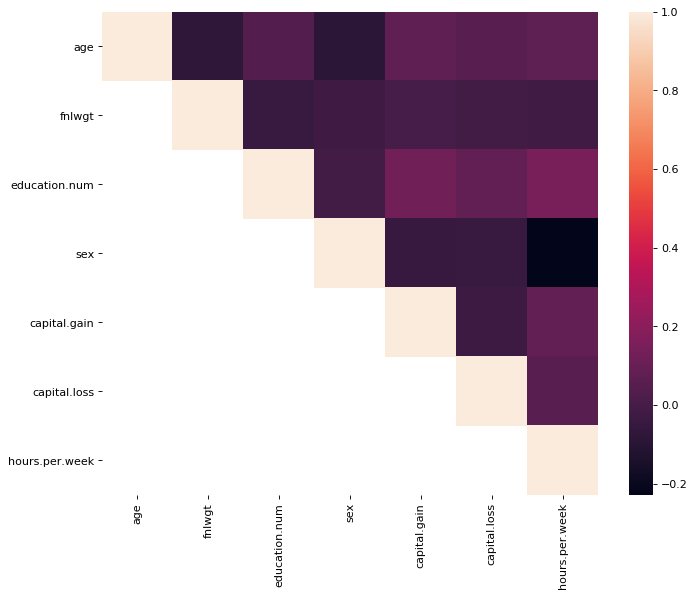

In [26]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(x,mask = y)
plt.show()